# Introduction to NumPyro

Probabilistic programming is a powerful approach to modeling and inference in machine learning and statistics. It allows us to build models that incorporate uncertainty and make probabilistic predictions. NumPyro is a probabilistic programming library that combines the flexibility of NumPy with the probabilistic modeling capabilities of Pyro, making it an excellent choice for researchers and data scientists. In this introductory tutorial, we'll explore the basics of NumPyro and how to get started with probabilistic programming.

## Prerequisites

In [51]:
#import matplotlib.pyplot as plt

#import numpyro
#import numpyro.distributions as dist
#from numpyro.infer import MCMC, NUTS, P
#import jax
#import jax.numpy as jnp

#import arviz as az

In a NumPyro program, you define a probabilistic model that consists of various elements. Let's break down the key elements of a typical NumPyro program:

1. Importing Libraries:

At the beginning of your NumPyro program, you import the necessary libraries, including NumPyro and other required dependencies like JAX and Pyro if applicable. For example:

In [52]:
import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS, Predictive
from numpyro.diagnostics import hpdi

import jax
import jax.numpy as jnp

import arviz as az
from scipy.stats import gaussian_kde

import matplotlib.pyplot as plt


2. Defining the Model Function:

In NumPyro, you define your probabilistic model as a Python function. This function encapsulates the entire model, including both the prior distributions and the likelihood. Typically, the model function takes one or more arguments, such as data or model parameters, and returns a set of latent variables and observations.

In [53]:
def model(data):
    # Define prior distributions for model parameters
    mean = numpyro.sample("mean", dist.Normal(0, 1))
    scale = numpyro.sample("scale", dist.Exponential(1))

    # Define likelihood
    with numpyro.plate("data_plate", len(data)):
        numpyro.sample("obs", dist.Normal(mean, scale), obs=data)


3. Prior Distributions:

- Inside the model function, you define prior distributions for the model parameters. These prior distributions represent your beliefs about the parameters before observing any data. You use the `numpyro.sample` function to specify these priors. In the example above, `mean` and `scale` are defined as random variables sampled from specific prior distributions.


4. Likelihood:

- After specifying the prior distributions, you define the likelihood of your observed data. The likelihood represents the probability distribution of your observed data given the model parameters. It describes how likely it is to observe the data under different parameter values. In the example, the numpyro.sample function is used to define the likelihood of the data points given the mean and scale parameters.

5. Plate for Repetition:
- In Bayesian modeling, you often work with multiple data points that share the same statistical structure. The `numpyro.plate` context manager allows you to create a plate, which represents a repeated structure for data. It's used to efficiently handle repeated observations. In the example, `numpyro.plate` is used to specify that the likelihood applies to multiple data points.

6. Inference Algorithm:

- After defining your model, you need to choose an inference algorithm to estimate the posterior distribution of model parameters. NumPyro supports various inference algorithms, including NUTS (No-U-Turn Sampler) and SVI (Stochastic Variational Inference). You initialize and configure the chosen inference algorithm according to your requirements.


In [54]:
nuts_kernel = NUTS(model)


8. Performing Inference:

- You use the configured inference algorithm to perform Bayesian inference. In the example, MCMC (Markov Chain Monte Carlo) inference is performed using the `MCMC` class. The `run` method of the `MCMC` object is called to run the inference process.

In [55]:
# Simulated data
data = jnp.array([2.3, 3.9, 1.7, -0.8, 2.5])


mcmc = MCMC(nuts_kernel, num_samples=1000, num_warmup=1000, num_chains=2)
mcmc.run(jax.random.PRNGKey(0), data)

/var/folders/q3/n2z18__9281b8xfhctcpxfsr0000gn/T/ipykernel_88949/317822218.py:5: UserWarning: There are not enough devices to run parallel chains: expected 2 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(2)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = MCMC(nuts_kernel, num_samples=1000, num_warmup=1000, num_chains=2)


sample: 100%|██████████| 2000/2000 [00:01<00:00, 1831.55it/s, 3 steps of size 7.44e-01. acc. prob=0.89]


9. Posterior Analysis:

- After running the inference, you can retrieve posterior samples of the model parameters. These samples represent the estimated posterior distribution of the parameters given the observed data. You can then analyze these samples to make inferences about your model.

In [56]:
# Get the posterior samples
posterior_samples = mcmc.get_samples()

# Print summary statistics of posterior
mcmc.print_summary()


                mean       std    median      5.0%     95.0%     n_eff     r_hat
      mean      1.17      0.69      1.19      0.04      2.27    885.10      1.01
     scale      1.87      0.62      1.74      0.97      2.72    783.04      1.00

Number of divergences: 0


10. Visualization and Inference:

- Finally, you can perform various tasks such as visualizing the posterior distributions, computing summary statistics, and making predictions or inferences based on the posterior samples.

array([[<AxesSubplot:title={'center':'mean'}>,
        <AxesSubplot:title={'center':'mean'}>],
       [<AxesSubplot:title={'center':'scale'}>,
        <AxesSubplot:title={'center':'scale'}>]], dtype=object)

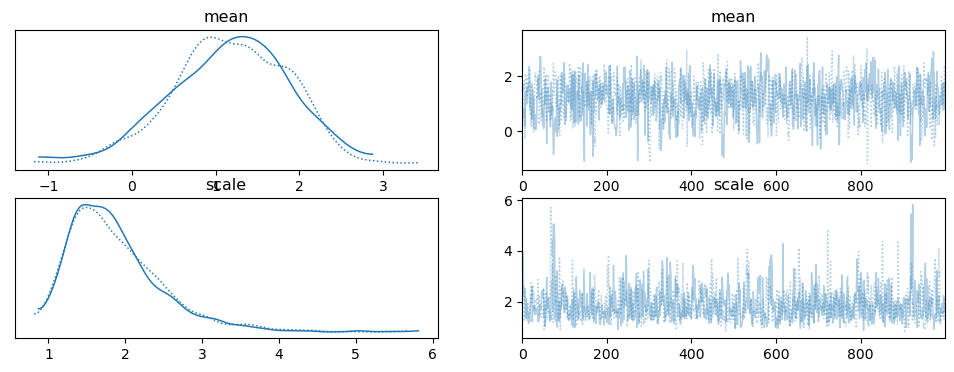

In [57]:
# Plot posterior distributions
az.plot_trace(mcmc)

These elements together form a typical NumPyro program for Bayesian probabilistic modeling. The key steps involve defining the model, specifying prior distributions and likelihood, selecting an inference algorithm, running the inference, and analyzing the posterior samples to draw conclusions about the model parameters.

## Summary

The typical elements that we will need to write are model in Numpyro are as follows:

- Parameters can be sampled using  <font color='green'>`numpyro.sample`</font>
- Parameters can be sampled from any of the available distributsions using, e.g.  <font color='green'>`dist.Beta(alpha, beta)`</font> 
- Likelihood is constructed by adding `obs=...` to the sampling statement: <font color='green'>`numpyro.sample('obs', dist.Binomial(n, p), obs=h)`</font>
- Once the model has been formulated, we need to specify
 - the sampling algorithm which we would like to use. NUTS is a good default oprtion: <font color='green'>`kernel = NUTS(model)` </font>,
 - number of warm-up steps, number of iterations, number of chains, e.g. <font color='green'>`MCMC(kernel, num_warmup=1000, num_samples=2000, num_chains=4)`</font>,
 - using <font color='green'>`Predictive` </font> class we can generate predictions.


In the example avobe

- We define a simple probabilistic model with two parameters: `mean` and `scale`.
- We specify priors for these parameters.
- The data is assumed to be normally distributed with parameters `mean` and `scale`.
- In this example, the likelihood is specified within the `numpyro.sample` statement inside the model function. NumPyro automatically evaluates the likelihood for the observed data points `(obs=data)` when performing MCMC inference.
- We use the No-U-Turn Sampler (NUTS) to perform Markov Chain Monte Carlo (MCMC) inference.
- Finally, we visualize the posterior distributions of the parameters.


Let's build a model step by step.

## Coin tossing 

### Data

In [58]:
n = 100    # number of trials
h = 61     # number of successes
alpha = 2  # hyperparameters
beta = 2

niter = 1000

### Model

In [59]:
def model(n, alpha=2, beta=2, h=None):

    # prior on the probability of success p
    p = numpyro.sample('p', dist.Beta(alpha, beta))

    # likelihood - notice the `obs=h` part
    # p is the probabiity of success,
    # n is the total number of experiments
    # h is the number of successes
    numpyro.sample('obs', dist.Binomial(n, p), obs=h)

### Prior Predictive check

A <font color='purple'>prior predictive check</font> is a method used in Bayesian statistics to assess the <font color='orange'>compatibility of a chosen prior distribution</font> with the observed data by simulating data from the prior and comparing it to the actual data - an overlooked but golden tool!

In [60]:
from jax import random

rng_key = random.PRNGKey(0)
rng_key, rng_key_ = random.split(rng_key)

# use the Predictive class to generate predictions.
# Notice that we are not passing observation `h` as data.
# Since we have set `h=None`, this allows the model to make predictions of `h`
# when data for it is not provided.
prior_predictive = Predictive(model, num_samples=1000)
prior_predictions = prior_predictive(rng_key_, n)

In [61]:
# we have generated samples for two variables
prior_predictions.keys()

dict_keys(['obs', 'p'])

In [62]:
# extract samples for variable 'p'
pred_obs = prior_predictions['p']

# compute its summary statistics for the samples of `p`
mean_prior_pred = jnp.mean(pred_obs, axis=0)
hpdi_prior_pred = hpdi(pred_obs, 0.89)

NameError: name 'gaussian_kde' is not defined

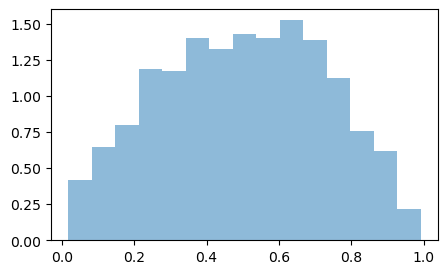

In [63]:
fig = plt.figure(dpi=100, figsize=(5, 3))
ax = fig.add_subplot(1, 1, 1)
ax.hist(pred_obs, bins=15, density=True, alpha=0.5)
x = jnp.linspace(0, 1, 3000)
kde = gaussian_kde(pred_obs)
ax.plot(x, kde(x), color='C0', lw=3, alpha=0.5)
ax.set_xlabel('p')
ax.set_title('Prior predictive distribution for p')
ax.set_xlim(0, 1)
ax.grid(0.3)
plt.show()

### Inference

Using the same routine as we did for prior redictive, we can perform inference by using the observed data.

rng_key = random.PRNGKey(0)
rng_key, rng_key_ = random.split(rng_key)

# specify inference algorithm
kernel = NUTS(model)

# define number of samples and number chains
mcmc = MCMC(kernel, num_warmup=1000, num_samples=2000, num_chains=4)

#run MCMC
mcmc.run(rng_key_, n=n, h=h)

# inpect summary
# r_hat is a dignostic comparing within chain variation to between chan variation.
# It is an importnat convergene diagnostic, and we want its valye to be close to 1
mcmc.print_summary()

NameError: name 'p_posterior_samples' is not defined

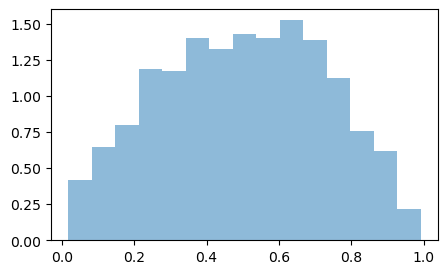

In [64]:
fig = plt.figure(dpi=100, figsize=(5, 3))
ax = fig.add_subplot(1, 1, 1)
ax.hist(pred_obs, bins=15, density=True, alpha=0.5, label = "Prior distribution")
ax.hist(p_posterior_samples, bins=15, density=True, alpha=0.5, label = "Posterior distribution")
x = jnp.linspace(0, 1, 3000)
kde = gaussian_kde(pred_obs)
ax.plot(x, kde(x), color='C0', lw=3, alpha=0.5)
kde = gaussian_kde(p_posterior_samples)
ax.plot(x, kde(x), color='C1', lw=3, alpha=0.5)
ax.set_xlabel('p')
ax.set_xlim(0, 1)
ax.grid(0.3)
plt.legend()
plt.show()

# exatract samples of parameter p
p_samples = mcmc.get_samples()
p_posterior_samples = p_samples['p']

## Conclusion

NumPyro is a versatile library for probabilistic programming that combines the power of NumPy and Pyro. In this introductory tutorial, we've covered the basics of defining a probabilistic model, performing MCMC inference, and visualizing the results. As you delve deeper into probabilistic programming with NumPyro, you'll be able to build more complex and customized models for your specific applications. Happy modeling!